## Pregunta 7
A partir del siguiente grafo ponderado no dirigido, aplique los pasos del Algoritmo de Kruskal para:
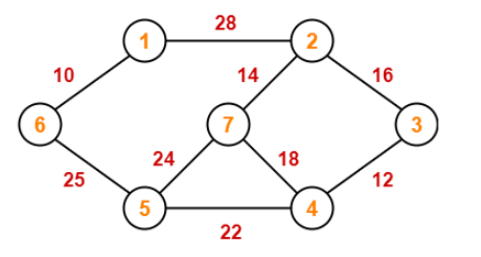

- (1pto) De forma manual: Construir el árbol de expansión mínimo (MST) 
- (1pto) De forma manual: Determinar el peso del MST obtenido. 
- (2 ptos) Utilizando el código del Algoritmo Kruskal, refrendar la solucion manual a nivel de grafo y peso minimo del MST resultante en a) y b)

In [32]:
#@title Clase DisjoinSet para usar union-find y clase grafo
from collections import defaultdict
class DisjointSet:
    def __init__(self, n):
        self.rank = [0] * n
        self.parent = [i for i in range(n)]
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        
        return self.parent[x]
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        
        if xroot == yroot:
            return
        
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1
class Graph():
    def __init__(self, V):
        self.V = V
        self.graph = defaultdict(list)
    
    def fromList(self, L):
        V = len(L)
        for u, e in enumerate(L):
              for v, w in e:
                 self.addEdge(u, v, w)
    def getList(self):
      result = []
      for key, values in sorted(self.graph.items()):
        temp_set = set()
        for pair in values:
            temp_set.add((pair[0], pair[1]))
        temp_list = list(temp_set)
        result.append(temp_list)
      return result

    def addEdge(self, src, dest, weight):
        newNode = [dest, weight]
        self.graph[src].insert(0, newNode)
        newNode = [src, weight]
        self.graph[dest].insert(0, newNode)
    
    def KruskalMST(self):
        n = self.V
        ds = DisjointSet(n)
        edges = [(w, u, v) for u in range(n) for v, w in self.graph[u]]
        edges.sort()
        mst = []
        result = []
        links = 0

        for w, u, v in edges:
            if ds.find(u) != ds.find(v):
                ds.union(u, v)
                result.append((u, v, w))
                mst.append((u, v))
                links += 1
            if links == n - 1:
                break
        tot_weight = 0
        for u, v, weight in result:
            tot_weight += weight
            print("%d -> %d: %d" % (u + 1, v + 1, weight))

        print("El costo del MST es: ", tot_weight)

        return mst

In [33]:
#@title Dibujado
import graphviz as gv
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp", defaultcolor="gray"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = defaultcolor
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [34]:
#@title Creacion de aristas segun el grafico
# donde 1 -> 0, 2 -> 1, etc
edges = [(0, 1, 28), (0, 5, 10), (1, 2, 16), (1, 6, 14), (2, 3, 12), (3, 4, 22), (3, 6, 18), (4, 5, 25), (4, 6, 24)]

In [35]:
#@title Creacion del grafo y adicion de aristas
g = Graph(7)
for e in edges:
  u, v, w = e
  g.addEdge(u, v, w)

In [36]:
#@title Ordenamiento de aristas (ayuda para la parte manual)
srte = []
for e in edges:
  u, v, w = e
  srte.append((w, u, v))

srte.sort()
for e in srte:
  w, u, v = e
  print("%d -> %d: %d" % (u + 1, v + 1, w))


1 -> 6: 10
3 -> 4: 12
2 -> 7: 14
2 -> 3: 16
4 -> 7: 18
4 -> 5: 22
5 -> 7: 24
5 -> 6: 25
1 -> 2: 28


1 -> 6: 10
3 -> 4: 12
2 -> 7: 14
2 -> 3: 16
4 -> 5: 22
5 -> 6: 25
El costo del MST es:  99

El grafo en su totalidad son las lineas grises
Las lineas naranjas conforman el MST


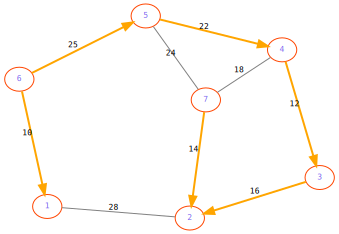

In [37]:
#@title Aristas del MST + grafo resultante
prntK = g.KruskalMST()
print("\nEl grafo en su totalidad son las lineas grises")
print("Las lineas naranjas conforman el MST")
adjlShow(g.getList(), "1234567",weighted=True, path=prntK, simplepath=False)